In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb

# Regular Expression to manipulate String
import re

# Ignore any warnings if exists due to version problem
import warnings
warnings.filterwarnings('ignore')

# Covert values to two place decimal numbers
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Read the csv file and check its attributes.

loan = pd.read_csv('D:/Arjun/Upgrad/Lending Club Case Study/loan.csv')

print('Shape')
print(f'{loan.shape}\n\n')

print('Column Information')
print(f'{loan.info()}\n\n')

print('Column DataTypes')
print(loan.dtypes)

Shape
(39717, 111)


Column Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Column DataTypes
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


# Starting Data Cleaning :- 

In [3]:
# Checking columns having null values.
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [4]:
# Droppping all columns having Null values.

# Running Below commented code, shows the Columns having Null values
# loan.iloc[:, 53:111]

# Dropping the Null columns from the loan dataset
loan.drop(loan.iloc[:, 53:111], inplace = True, axis = 1)

In [5]:
# Dropping Other columns which are mostly nulls
colums_list = ['mths_since_last_major_derog', 'next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'member_id',
               'url', 'emp_title', 'zip_code','collections_12_mths_ex_med','policy_code']
loan.drop(labels = colums_list, axis = 1, inplace = True)

In [6]:
# Data Structure after dropping all the columns
loan.shape

(39717, 43)

In [7]:
# Formating emp_length column as number and fill the na values with 0
loan.emp_length.fillna('0', inplace=True)
loan['emp_length'] = loan.emp_length.str.extract('(\d+)')  # Extract only digits and refill the column

In [8]:
# Lets check how the column data looks now for the column "emp_length"
loan['emp_length'].head(5)

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object

In [9]:
# Remove percentage symbol from revol_util column
loan['revol_util'] = loan.revol_util.str.rstrip('%')

# Remove percentage sign from the interest rate column
loan['int_rate'] = loan.int_rate.str.rstrip('%')

In [10]:
# Among the total loans issued, checking on the loan status.
(loan.loan_status.value_counts() * 100)/len(loan)

# Here we observe that :-
# 82.96 percent loans are paid fully by the customers
# 14.17 percent loans are charged off
# And only 2.87 percent loans are open/ in progress on installments by the Customer

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [11]:
# Purpose for which the loans were taken by the customers.
(loan.purpose.value_counts() * 100)/len(loan)

# We can observe from here, that,
# The maximum loans were taken for debt consoiliodation
# Followed by Credit Card, for other also we have loans taken at 10.05 %

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

# Creating Derived Columns :-

In [12]:
# Create Derived Columns Month and Year
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan.issue_d.dt.year
loan['month']=loan.issue_d.dt.month

In [13]:
# Loan dataset now has two new columns:- month and year
loan.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,year,month
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,2011,12
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,1,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL,2011,12
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,2011,12
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,2011,12
4,1075358,3000,3000,3000.00,60 months,12.69,67.79,B,B5,1,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,2011,12
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,INDIVIDUAL,2011,12
6,1069639,7000,7000,7000.00,60 months,15.96,170.08,C,C5,8,...,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,INDIVIDUAL,2011,12
7,1072053,3000,3000,3000.00,36 months,18.64,109.43,E,E1,9,...,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,INDIVIDUAL,2011,12
8,1071795,5600,5600,5600.00,60 months,21.28,152.39,F,F2,4,...,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,INDIVIDUAL,2011,12
9,1071570,5375,5375,5350.00,60 months,12.69,121.45,B,B5,1,...,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,INDIVIDUAL,2011,12


# Univariate Analysis:-

In [14]:
# loan amount basic statistics
loan.loan_amnt.describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

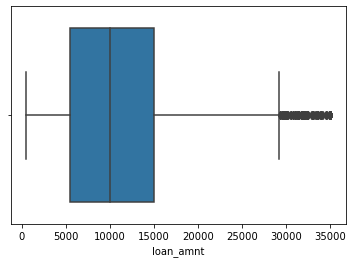

In [15]:
# Boxplot for loan amount
sb.boxplot(loan.loan_amnt)

In [16]:
# Total Payment done, basic statistics
loan.total_pymnt.describe()

count   39717.00
mean    12153.60
std      9042.04
min         0.00
25%      5576.93
50%      9899.64
75%     16534.43
max     58563.68
Name: total_pymnt, dtype: float64

<AxesSubplot:xlabel='total_pymnt'>

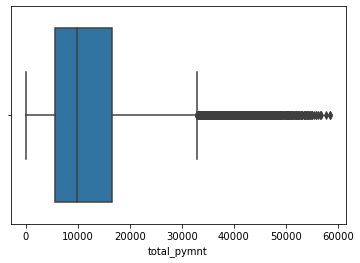

In [17]:
# Box plot for total Payment received
sb.boxplot(loan.total_pymnt)

In [18]:
# Comming to annual income statistics we would want to remove the outliers

# .99 quantile to be removed from Annual income
loan = loan[loan.annual_inc < loan.annual_inc.quantile(0.99)]

# After Outlier removeal
loan.annual_inc.describe()

count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

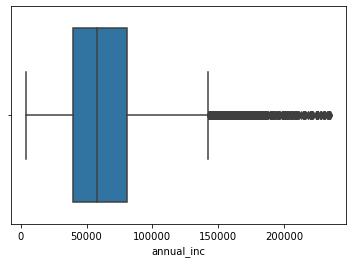

In [19]:
sb.boxplot(loan.annual_inc)

In [20]:
# Interest Rate Basic Statistics
loan.int_rate = loan.int_rate.astype(float)
loan.int_rate.describe()

# From here, we can see the average interest rate is 12% charged by the lender
# The minimum rate charged is 3.72% and the maximum interest charged is 24%
# We also observed that when the 75% crosses the loan amount shootsup from 14.54% to 24.59%.

count   39319.00
mean       12.01
std         3.72
min         5.42
25%         9.25
50%        11.83
75%        14.54
max        24.59
Name: int_rate, dtype: float64

<AxesSubplot:xlabel='int_rate'>

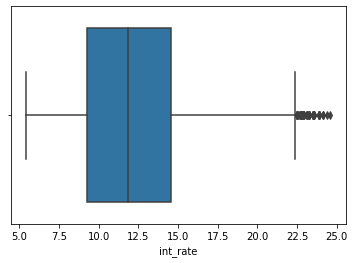

In [21]:
sb.boxplot(loan.int_rate)

# Correlation Matrix-Quantitative Variables:

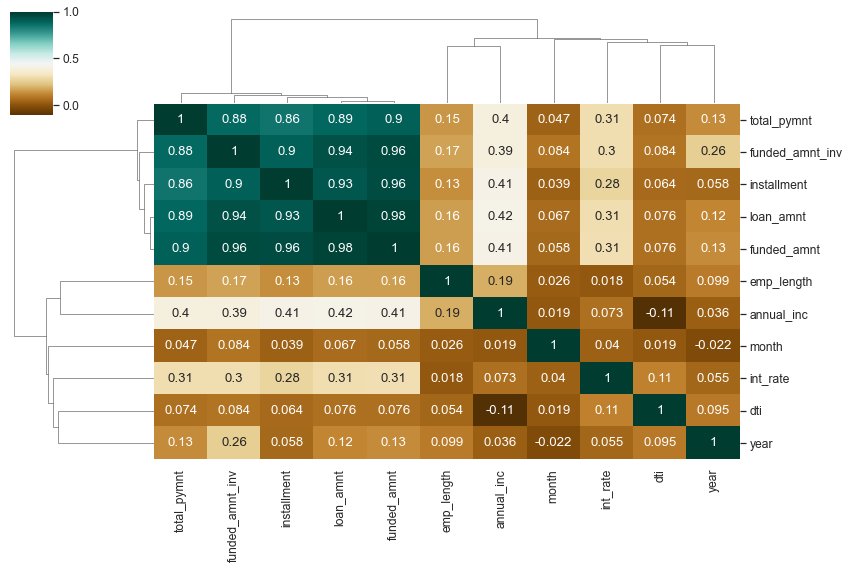

In [22]:
# Bivariate Analysis
# Convert amount columns to numeric
columns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[columns] = loan[columns].apply(pd.to_numeric)

# Convert non required correlation columns to non numeric
columns = ['id','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc','out_prncp','out_prncp_inv',
           'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries',
           'collection_recovery_fee','last_pymnt_amnt']
loan[columns] = loan[columns].astype(str)

# to see how the numeric variables differ wwe have implemented a heatmap with dendogram
loan_correlation = loan.corr()
sb.set(font_scale=1.1)
sb.clustermap(loan_correlation, annot=True, figsize=(12,8), cmap="BrBG")
plot.show()

# We observed that loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# When annual income is low, DTI is high and vice versa.
# Positive correlation between annual income and employment years, which suggests that annual income increases with 
# increase in experience

In [23]:
# Data Cleaning
# Dropping columns not needed for further analysis.
columns_drop_list = ['installment', 'addr_state', 'initial_list_status']
loan.drop(labels = columns_drop_list, axis =1, inplace=True)
print(loan.shape)

(39319, 42)


# Derived Columns

In [24]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into buckets for bivariate analysis.
loan['dti_cats'] = pd.cut(loan['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

# Taking a look at the dataset
print(loan.shape)
loan.head(1)

(39319, 46)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,5000,5000,4975.00,36 months,10.65,B,B2,10,RENT,...,Jan-15,171.62,May-16,INDIVIDUAL,2011,12,0-7000,20000-40000,10-13,NaN


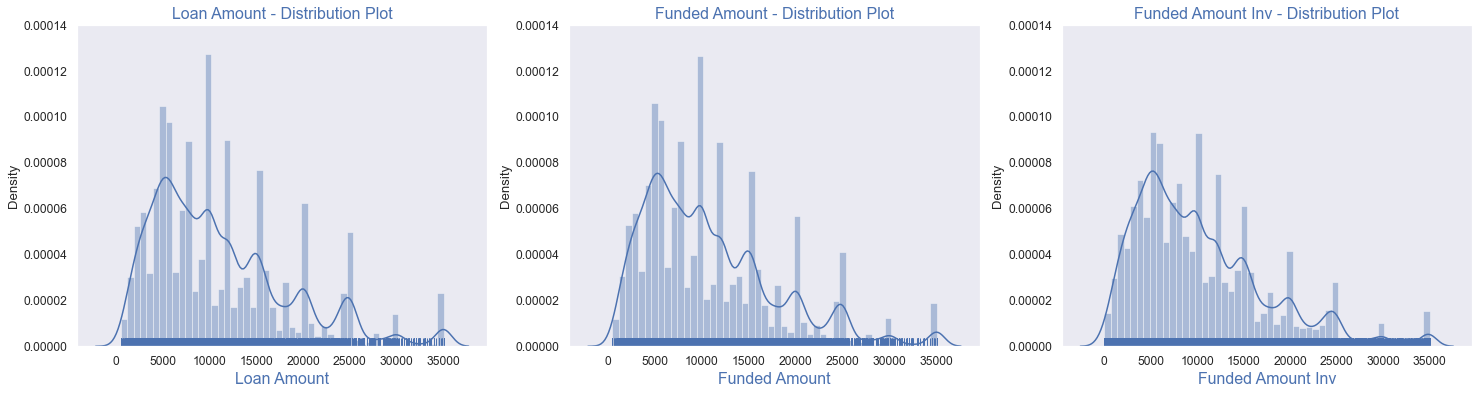

In [25]:
# Checking three loan amount fields using distribution plots.

plot.figure(figsize=(25,13), facecolor='w')
sb.set_style("dark")

plot.subplot(2,3,1)
ax = sb.distplot(loan.loan_amnt, rug=True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Loan Amount',fontsize=16,color='b')
ax.set_ylim(0.00000,0.00014)

plot.subplot(2,3,2)
ax = sb.distplot(loan.funded_amnt, rug=True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Funded Amount',fontsize=16,color='b')
ax.set_ylim(0.00000,0.00014)

plot.subplot(2,3,3)
ax = sb.distplot(loan.funded_amnt_inv, rug=True)
ax.set_title('Funded Amount Inv - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Funded Amount Inv',fontsize=16,color='b')
ax.set_ylim(0.00000,0.00014)

plot.show()

# Observation
# The amount disctribution within all these threee fields are near to similar.
# Will consider loan_Amount field for further analysis.

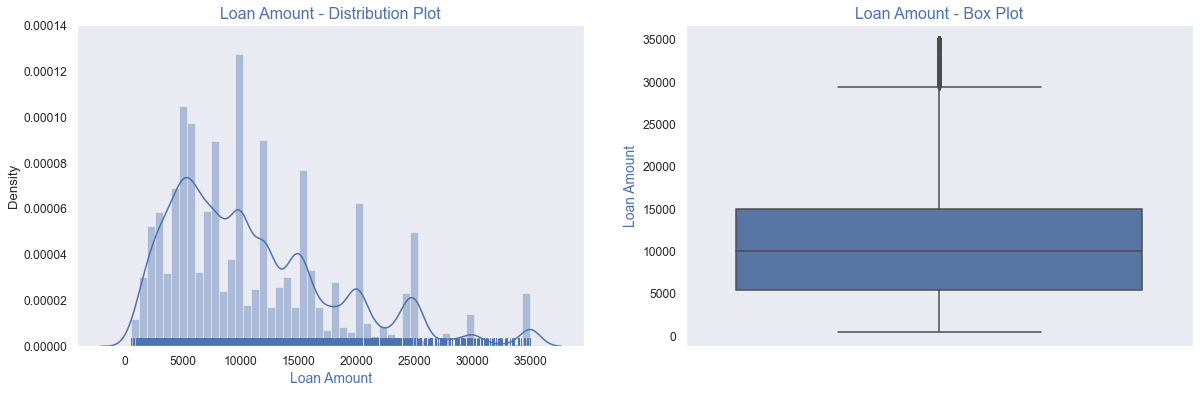

In [26]:
# Univariate Analysis on column Loan amount

plot.figure(figsize=(20,13),facecolor='w')
sb.set_style("dark")

plot.subplot(2, 2, 1)
ax = sb.distplot(loan.loan_amnt,rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='b')

plot.subplot(2, 2, 2)
ax = sb.boxplot(y=loan.loan_amnt)
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Loan Amount',fontsize=14,color='b')

plot.show()

# Observation
# From both the plots we can see that most of the loan amounts given is within 5000 to 15000 range.

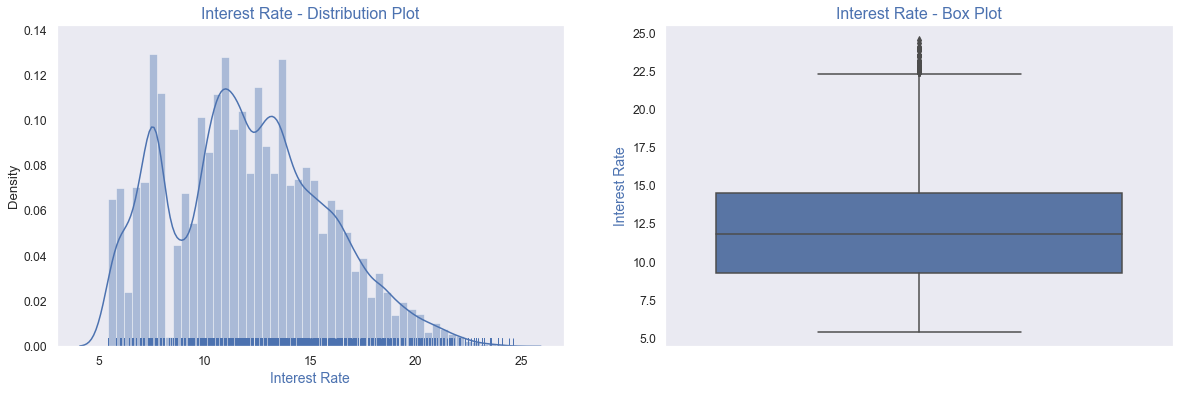

In [27]:
# Univariate Analysis on column Interest Rate

plot.figure(figsize=(20,13),facecolor='w')
sb.set_style("dark")

plot.subplot(2, 2, 1)
ax = sb.distplot(loan.int_rate,rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Interest Rate',fontsize=14,color='b')

plot.subplot(2, 2, 2)
ax = sb.boxplot(y=loan.int_rate)
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color='b')

plot.show()

# Observation
# Most of the Interest rates are from 10 to 15 percent on loan amount.

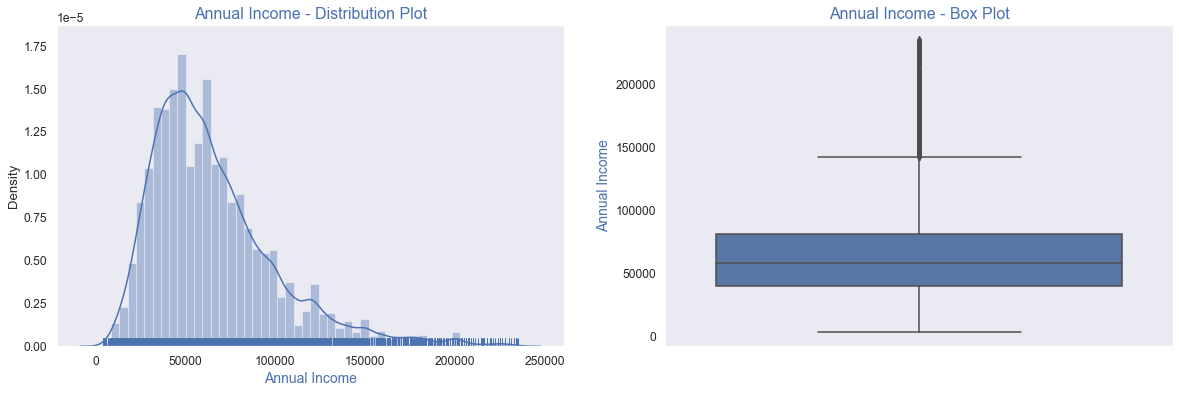

In [28]:
# Univariate Analysis on column Annual Income

plot.figure(figsize=(20,13),facecolor='w')
sb.set_style("dark")

plot.subplot(2, 2, 1)
ax = sb.distplot(loan.annual_inc,rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Annual Income',fontsize=14,color='b')

plot.subplot(2, 2, 2)
ax = sb.boxplot(y=loan.annual_inc)
ax.set_title('Annual Income - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Annual Income',fontsize=14,color='b')

plot.show()

# Observation
# the annual Income of most of the borrowers are from around 40000 to 70000 annualy,

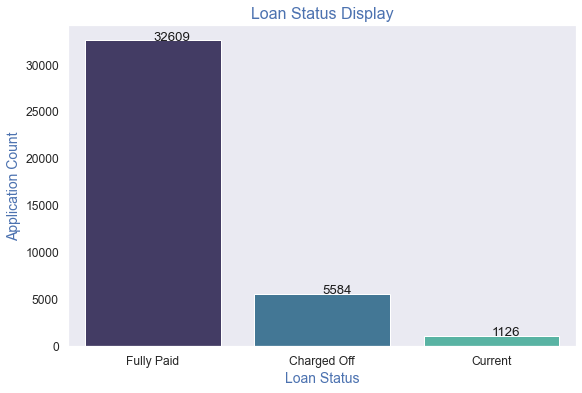

In [29]:
# Univariate Analysis on Loan Status

plot.figure(figsize=(20,13),facecolor='w')
sb.set_style("dark")

plot.subplot(2, 2, 1)
ax = sb.countplot(x="loan_status", data=loan, palette='mako')
ax.set_title('Loan Status Display',fontsize=16,color='b')
ax.set_xlabel('Loan Status',fontsize=14,color='b')
ax.set_ylabel('Application Count', fontsize=14, color='b')

loan_value_count = loan.loan_status.value_counts()
for i, v in loan_value_count.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3, v.loan_status, color = 'k')

plot.show()

# Observation
# We observed that the most loans are already Fully paid.
# There are few loans which are charged off.
# Currently there are 1126 loans, installment of which is still being given by the borrowers.

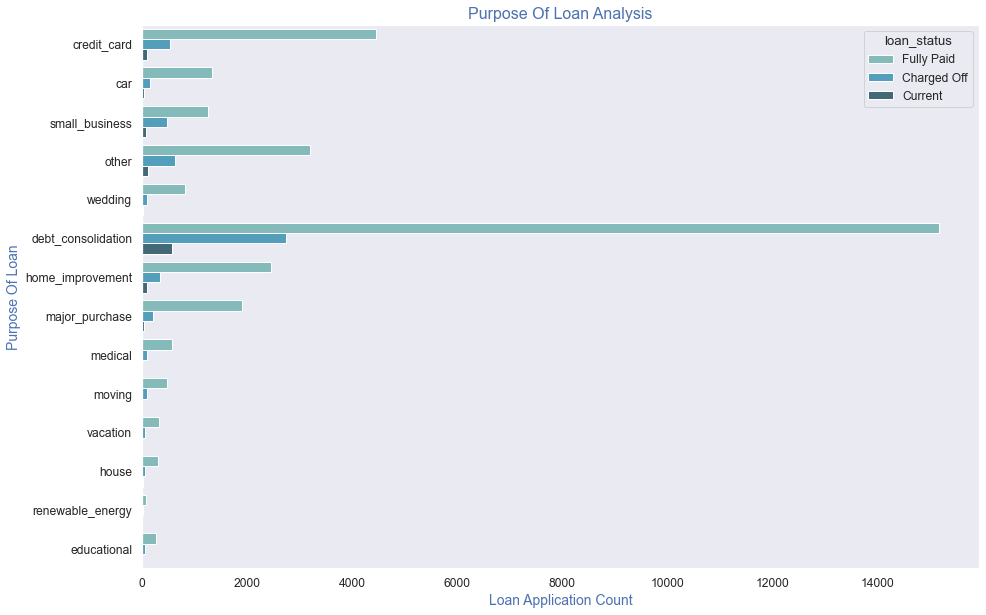

In [30]:
# Univariate Analysis on Purpose Of Loan

plot.figure(figsize=(15, 10),facecolor='w')
sb.set_style("dark")

ax = sb.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan Analysis',fontsize=16,color='b')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plot.show()

# Observation
# This figure shows us that the maximum loans were taken for debt_consolidation
# Followed by, for the payments of credit card bill
# Most loans which weer charged offbelongs to the loans borrowed for debt_consolidation, 
# which is currently holding the maximum number of loans which are active currently.

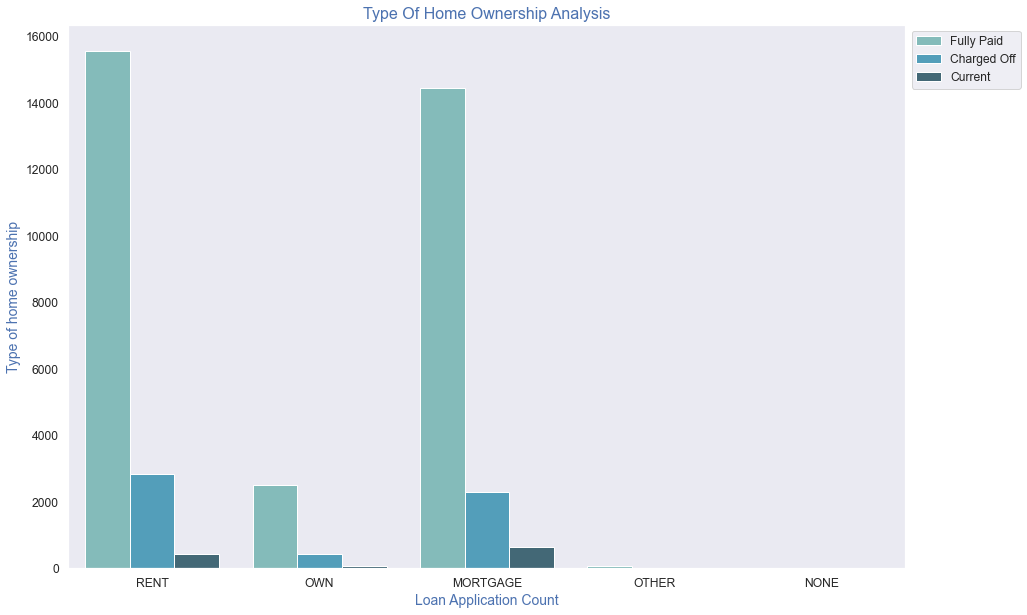

In [31]:
# Univariate Analysis on Home Ownership.

plot.figure(figsize=(15,10),facecolor='w')
sb.set_style("dark")

ax = sb.countplot(x="home_ownership",data=loan,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1)) # To move anchor for the legend to the right of the plot.
ax.set_title('Type Of Home Ownership Analysis',fontsize=16,color='b')
ax.set_ylabel('Type of home ownership',fontsize=14,color = 'b')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'b')      
plot.show()

# Observation
# Shows the maximum number of loan borrowers live in Rented places or have their house under mortgage.

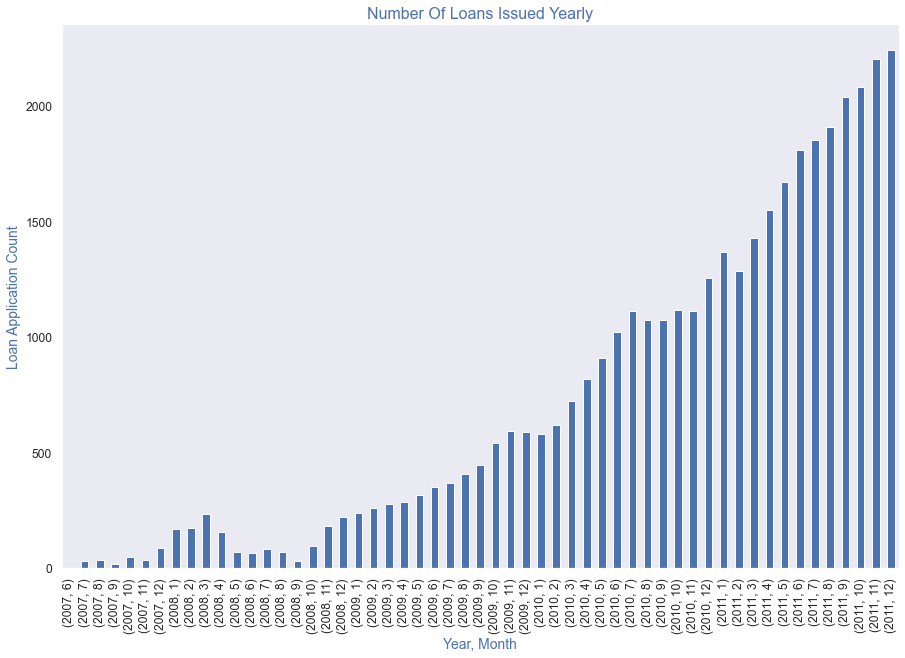

In [32]:
# Lets check the derived column loans and see the pattern in which the loans were given over the years.

plot.figure(figsize=(15,10),facecolor='w')
sb.set_style("dark")
loan.groupby(['year','month']).id.count().plot(kind='bar')
plot.title('Number Of Loans Issued Yearly',fontsize=16,color='b')
plot.ylabel('Loan Application Count',fontsize=14,color = 'b')
plot.xlabel('Year, Month',fontsize=14,color = 'b')      
plot.show()

# Observation.
# Most Loans were issued in the year 2011 and most number of loans recorded was for the month December 2011.
# Loan application usually shows increasing every year, i.e by every year the organization is providing loans to more 
# customers/borrowers
# In 2008 from April till September the loan applications were less compared to other years, and in these months the 
# loan application were decresing till September.
# Again 2008 October saw a rise in loan applications.

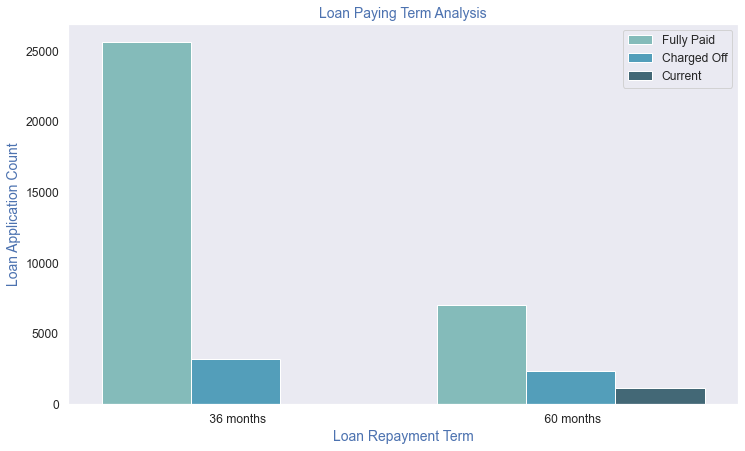

In [33]:
# Checking the Loan Paying Term compared to the loan application count

plot.figure(figsize=(12,7),facecolor='w')
ax = sb.countplot(x="term",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term Analysis',fontsize=14,color='b')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plot.show()

# Observation
# The most of the loan application are for 36 months, where more number of borrowers could pay the loan amount in full while 
# compared to loans whih had tenure of 60 months where there are more number of charged of loans with comparison to loans given.
# The loans which are currently active are all having tenure of the loans as 60 months.

In [34]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Borrowers with income less than 20000, has the most number or proportion or possibility of loan charged off.
# With increase in income we see less loan charged off, that is the borrowers were able to settle the loan better with 
# increase in incume.

loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.20
1,20000-40000,1514,170,7004,8688,0.17
2,40000-60000,1729,345,9534,11608,0.15
3,60000-80000,1024,240,6597,7861,0.13
4,80000 +,1080,362,8531,9973,0.11


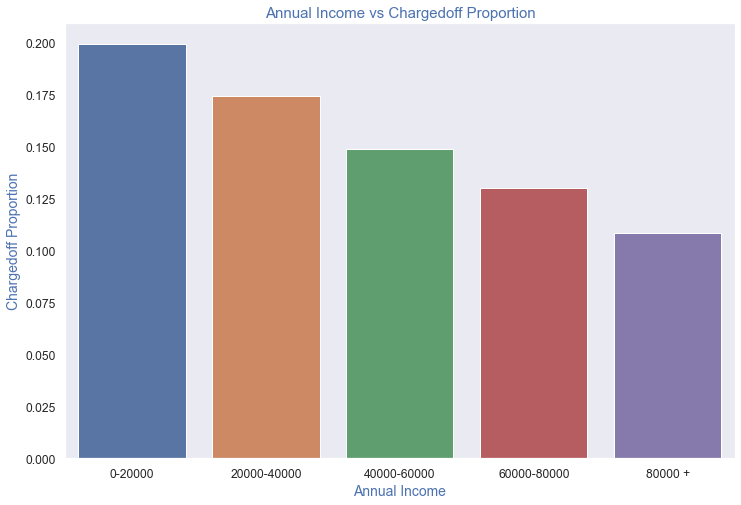

In [35]:
# Plotting bar plots on the data we observed above having the loan charged of proportion compared to annual income basically.

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sb.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
ax1.set_xlabel('Annual Income',fontsize=14,color='b')
plot.show()

# The above observations can be viewed her in detail.
# Borrowers having income more than 80000 has less possibility of loans getting charged off.
# Increase in income reduces the charged off proportion.

In [36]:
# Bivariate Analysis to check the purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observation
# Borrowers having small business has more possibility of loans getting charged off.
# The loans taken for wedding or for big purchases or for cars, has more posibility of getting repaid.

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,472.00,74.00,1251.00,1797.00,0.26
10,renewable_energy,19.00,1.00,81.00,101.00,0.19
3,educational,55.00,0.00,268.00,323.00,0.17
9,other,629.00,126.00,3203.00,3958.00,0.16
8,moving,91.00,7.00,479.00,577.00,0.16
5,house,58.00,14.00,299.00,371.00,0.16
7,medical,106.00,12.00,568.00,686.00,0.15
2,debt_consolidation,2752.00,580.00,15165.00,18497.00,0.15
12,vacation,53.00,6.00,322.00,381.00,0.14
4,home_improvement,338.00,97.00,2459.00,2894.00,0.12


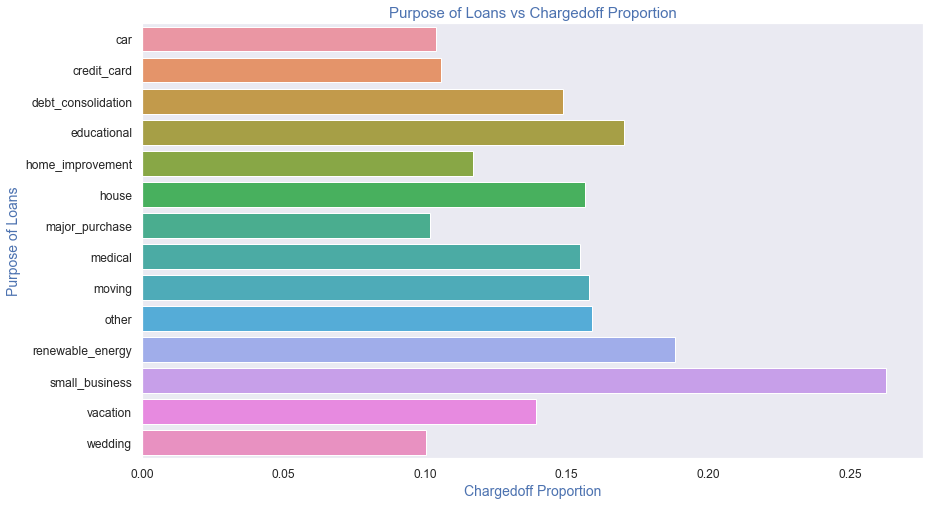

In [37]:
# Bar plot on data checked above.
fig, ax1 = plot.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sb.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14,color='b')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'b')
plot.show()

# Borrowers having small business has more possibility of loans getting charged off.
# The loans taken for wedding or for big purchases or for cars, has more posibility of getting repaid.

In [38]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loan.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observation
# Borrowers with Grade A has least chance of loans getting charged off.
# With movement of grade from A towards G the chance of loan charge off is increasing.

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,99,17,190,306,0.32
5,F,312,71,642,1025,0.30
4,E,704,176,1906,2786,0.25
3,D,1112,216,3916,5244,0.21
2,C,1342,262,6411,8015,0.17
1,B,1414,344,10167,11925,0.12
0,A,601,40,9377,10018,0.06


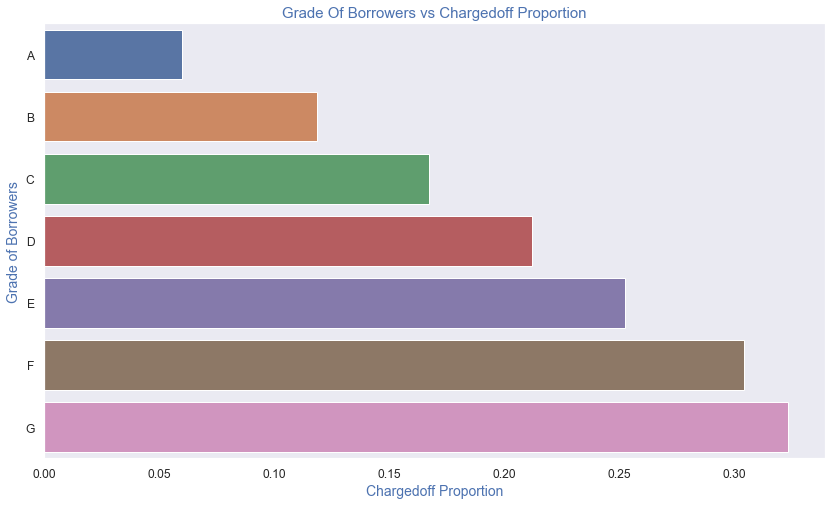

In [39]:
# Lets plot the above calculation on grad3e vs charged of proportion

fig, ax1 = plot.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('Grade Of Borrowers vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sb.barplot(y='grade', x='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_ylabel('Grade of Borrowers',fontsize=14,color='b')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'b')
plot.show()

# Observation
# Borrowers with Grade A has least chance of loans getting charged off.
# With movement of grade from A towards G the chance of loan charge off is increasing.

In [40]:
# To check and do deeper analysis on grades, checking the subgrades vs charged of proportion

subgrade_vs_loan = loan.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
subgrade_vs_loan['Total'] = subgrade_vs_loan['Charged Off'] + subgrade_vs_loan['Current'] + subgrade_vs_loan['Fully Paid'] 
subgrade_vs_loan['Chargedoff_Proportion'] = subgrade_vs_loan['Charged Off'] / subgrade_vs_loan['Total']
subgrade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observation:- Difficult to check in one go, as lots of data, need a plot for this.

loan_status,sub_grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
29,F5,53.00,4.00,55.00,112.00,0.47
32,G3,19.00,3.00,25.00,47.00,0.40
31,G2,27.00,1.00,47.00,75.00,0.36
34,G5,10.00,1.00,18.00,29.00,0.34
28,F4,52.00,17.00,96.00,165.00,0.32
30,G1,31.00,10.00,61.00,102.00,0.30
23,E4,126.00,28.00,293.00,447.00,0.28
26,F2,69.00,16.00,162.00,247.00,0.28
27,F3,50.00,11.00,118.00,179.00,0.28
25,F1,88.00,23.00,211.00,322.00,0.27


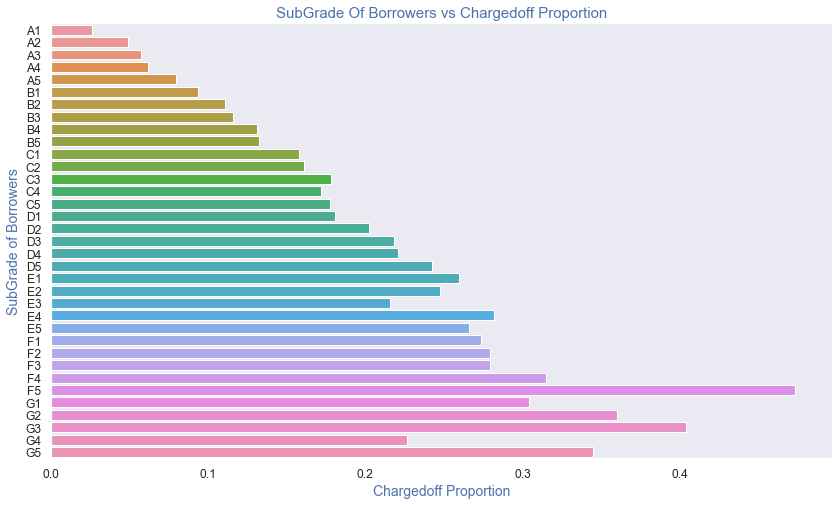

In [41]:
# Lets plot the above calculation on subgrade vs charged of proportion

fig, ax1 = plot.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('SubGrade Of Borrowers vs Chargedoff Proportion',fontsize=15,color = 'b')
ax1=sb.barplot(y='sub_grade', x='Chargedoff_Proportion', data=subgrade_vs_loan)
ax1.set_ylabel('SubGrade of Borrowers',fontsize=14,color='b')
ax1.set_xlabel('Chargedoff Proportion',fontsize=14,color = 'b')
plot.show()

# Observation:-
# Similar to grades for Sub grades also the possibility of loans getting charged off is increasing from A towards G,
# The borrowers having Sub grades of F and G has the highest possibility of their loans getting charged off.
# Looking at the subgrade F5, we can see that the borrowers falling under this subgroup has the the highest number of their 
# loans getting charged off.

In [42]:
# Lets see the impact of interest rates over charged of proportion

intrate_vs_loan = loan.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
intrate_vs_loan['Total'] = intrate_vs_loan['Charged Off'] + intrate_vs_loan['Current'] + intrate_vs_loan['Fully Paid'] 
intrate_vs_loan['Chargedoff_Proportion'] = intrate_vs_loan['Charged Off'] / intrate_vs_loan['Total']
intrate_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observation:-
# We can see that the borrowers for whom higher interest rates has been applied has the possibility of their loans 
# getting charged off.
# With less interest percent levied on the borrowers the loans had more chance of full payment.

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1250,351,3317,4918,0.25
2,12.5-16,1995,329,9354,11678,0.17
1,10-13,1224,269,8083,9576,0.13
0,0-10,825,77,11403,12305,0.07


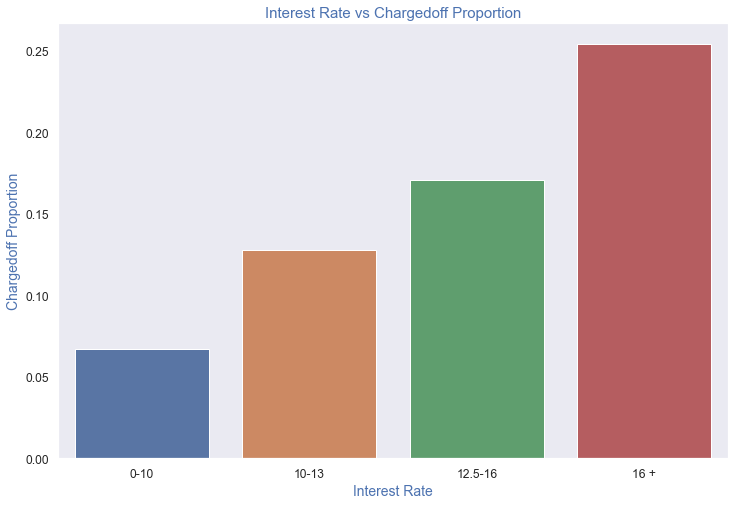

In [43]:
# Plotting on the above calculation
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sb.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=intrate_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plot.show()

# Observation:-
# We can see that the borrowers for whom higher interest rates has been applied has the possibility of their loans 
# getting charged off.
# With less interest percent levied on the borrowers the loans had more chance of full payment.

In [44]:
# Lets see the impact of employment length over charged of proportion

emplengthg_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplengthg_vs_loan['Total'] = emplengthg_vs_loan['Charged Off'] + emplengthg_vs_loan['Current'] + emplengthg_vs_loan['Fully Paid'] 
emplengthg_vs_loan['Chargedoff_Proportion'] = emplengthg_vs_loan['Charged Off'] / emplengthg_vs_loan['Total']
emplengthg_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observation:-
# Will check in the below graph representation

loan_status,emp_length,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0,227,42,801,1070,0.21
10,10,1316,386,7038,8740,0.15
7,7,262,62,1435,1759,0.15
1,1,1090,143,6533,7766,0.14
5,5,456,87,2712,3255,0.14
8,8,203,43,1216,1462,0.14
6,6,305,58,1846,2209,0.14
3,3,551,82,3426,4059,0.14
4,4,456,94,2860,3410,0.13
2,2,561,97,3684,4342,0.13


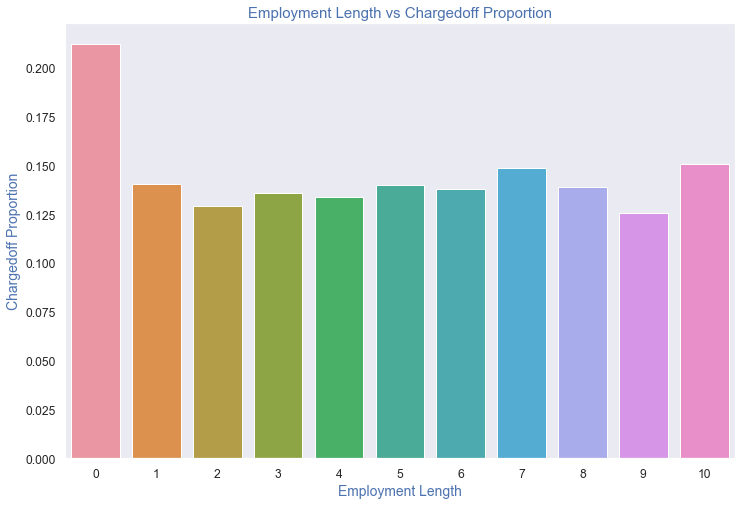

In [45]:
# Graph representation of the above calculation

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sb.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplengthg_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plot.show()

# Observation
# Here we see that the borrowers who are working for less than 1 year has more chance of getting their loan charged off.
# Less money less experience can be the reason.

In [46]:
#  Lets analyze the verification status of the employee compared to the charged off proportion

empverification_vs_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
empverification_vs_loan['Total'] = empverification_vs_loan['Charged Off'] + empverification_vs_loan['Current'] + empverification_vs_loan['Fully Paid'] 
empverification_vs_loan['Chargedoff_Proportion'] = empverification_vs_loan['Charged Off'] / empverification_vs_loan['Total']
empverification_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observation:-
# Here we observed that the verified borrowers has more chance of their loan getting charged off comparatively, 
# this was a bit surprising.

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2032,593,10000,12625,0.16
1,Source Verified,1422,306,8135,9863,0.14
0,Not Verified,2130,227,14474,16831,0.13


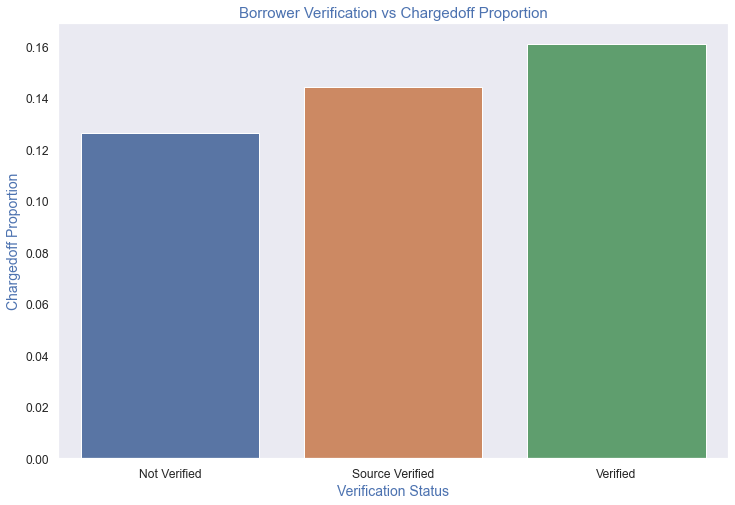

In [47]:
# Plotting the above calculation

fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='w')
ax1.set_title('Borrower Verification vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sb.barplot(x='verification_status', y='Chargedoff_Proportion', data=empverification_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plot.show()

# Observation:-
# Here we observed that the verified borrowers has more chance of their loan getting charged off comparatively, 
# this was a bit surprising.

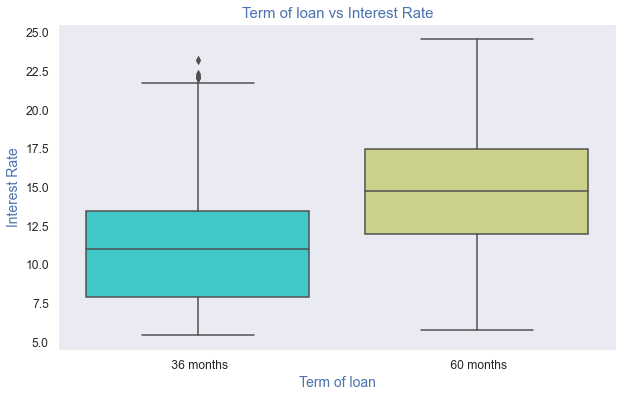

In [48]:
# Analysis of Term of loan vs Interest Rate

plot.figure(figsize=(10,6),facecolor='w')
ax = sb.boxplot(y='int_rate', x='term', data =loan,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Term of loan',fontsize=14,color = 'b')
plot.show()

# Observation:
# Well compared to 36 months tenure the 60 months tenure loans have higher rate of interest.
# More tenure has more interest rates.

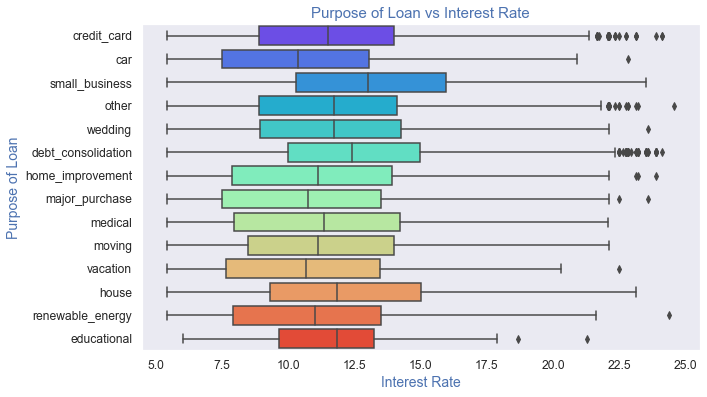

In [49]:
# Analysis of purpose vs Interest Rate

plot.figure(figsize=(10,6),facecolor='w')
ax = sb.boxplot(y='purpose', x='int_rate', data =loan,palette='rainbow')
ax.set_title('Purpose of Loan vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'b')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'b')
plot.show()

# Observation:-
# Small business loans have the highest interest rates for the borrowers.
# Followed by loans taken for House and debt consolidation.

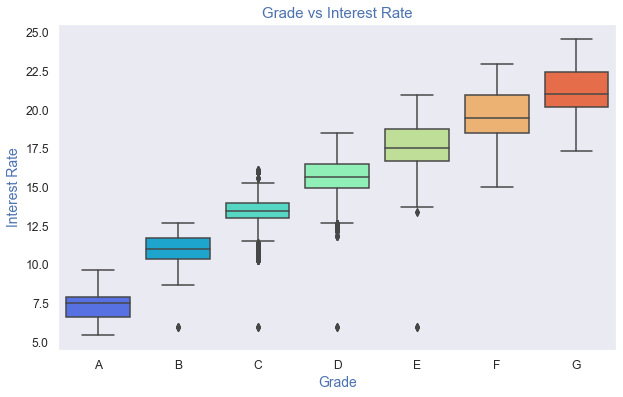

In [50]:
# Analysis of grade vs Interest Rate

plot.figure(figsize=(10,6),facecolor='w')
ax = sb.boxplot(y='int_rate', x='grade', data =loan,palette='rainbow', order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Grade',fontsize=14,color = 'b')
plot.show()

# Observation:-
# The borrowers who are grade 'G' has the highest interest rates as we saw 
# that the grade G borrowers have the most chance of thir loan gettring charged off.
# The lender feels more confident while lending to grade A borrowers.

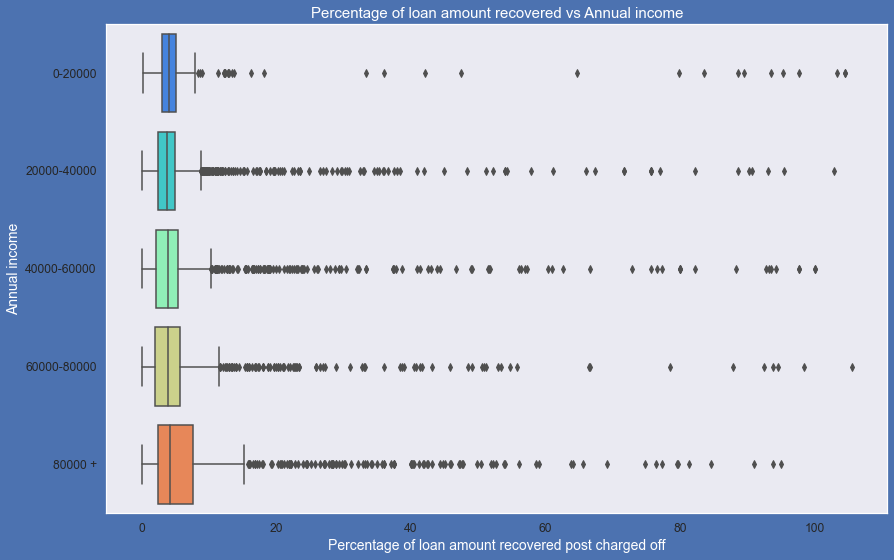

In [51]:
# Analysis of Recoveries vs Annual income

loan['recoveries']=pd.to_numeric(loan['recoveries'],errors='coerce')
loan_df_rec=loan[loan['recoveries'] > 0.00]

# calculate recovery percentage 
loan_df_rec['recovery_prcnt']=((loan_df_rec['recoveries']/loan_df_rec['loan_amnt']) * 100) 

# plot
plot.figure(figsize=(14,9),facecolor='b')
ax=sb.boxplot(x='recovery_prcnt',y='annual_inc_cats',data=loan_df_rec,palette='rainbow')
ax.set_title('Percentage of loan amount recovered vs Annual income',fontsize=15,color = 'w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Percentage of loan amount recovered post charged off',fontsize=14,color = 'w')
plot.show()

# Higher annual income has a higher loan recovery percentage.

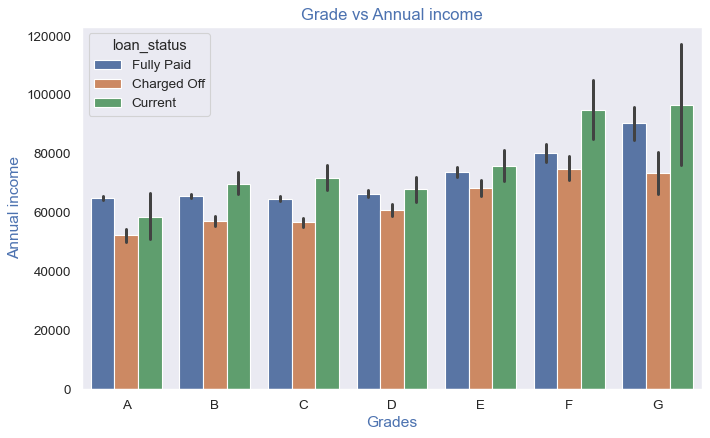

In [52]:
# Analysis to show variation of annual income across grade for every loan status.

plot.figure(figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
ax=sb.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='b')
ax.set_ylabel('Annual income',fontsize=14,color = 'b')
ax.set_xlabel('Grades',fontsize=14,color = 'b')
plot.show()

# Observation:
# From this plot we understand that the ones having less annual income are having their loans charged of for each grade.

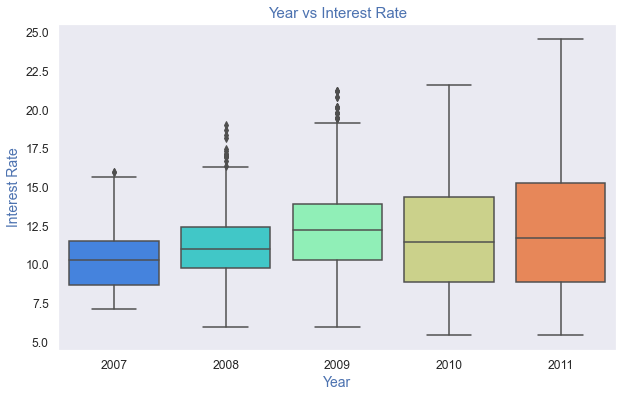

In [53]:
# Analysis to show the dependency of years vs Interest rates.

plot.figure(figsize=(10,6), facecolor='w')
ax=sb.boxplot(x='year', y='int_rate', data=loan, palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='b')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'b')
ax.set_xlabel('Year',fontsize=14,color = 'b')
plot.show()

# Observation:
# The plot shows that the interest rate is increasing with increase in years of experience.

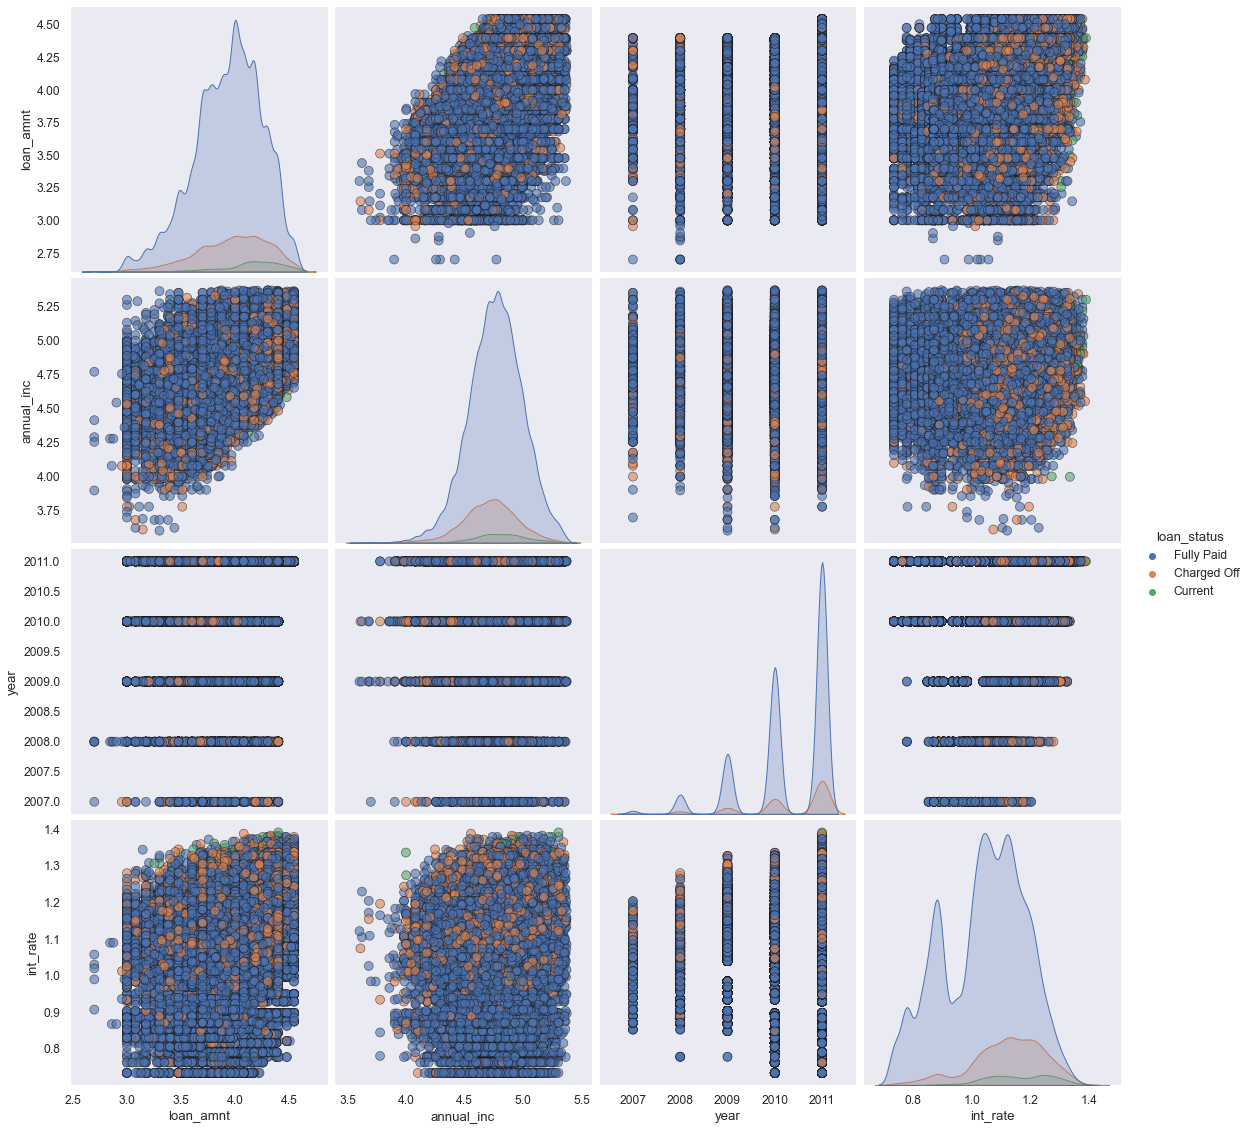

In [54]:
# Lets check for a pair plot as multivariate analysis.

loan_pair = loan[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sb.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plot.show()

# Observation
# Higher loan amount with higher annual income.
# With increase in year the charged of loan  numbers are increasing.
# Increase in loan amount increases interest

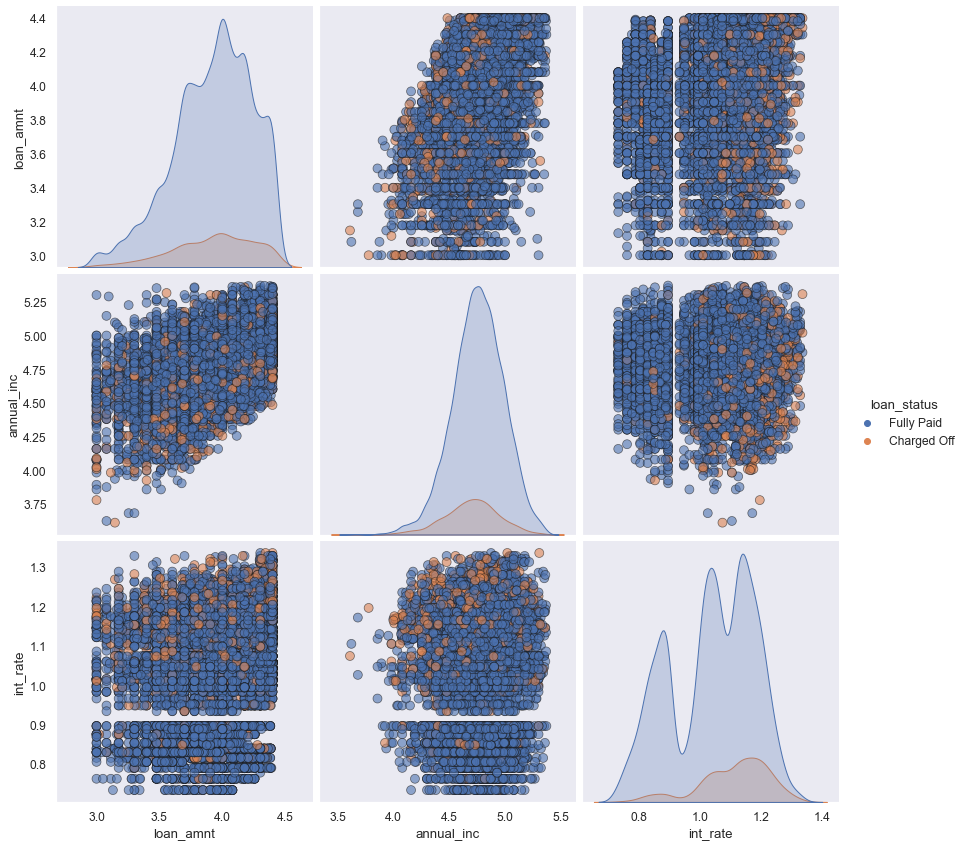

In [56]:
# Above plot is too dense to understand , so picking up year 2010 for getting some insights.

sb.pairplot(loan_pair[loan_pair['year'] == 2010], 
             vars = ['loan_amnt', 'annual_inc', 'int_rate'], 
             hue = 'loan_status', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

# Observation:-
# Higher loan amount with higher annual income.
# Increase in loan amount increases interest